The following are the questions initially striked upon analysing the TMDB dataset.
1.Why there are zero runtime in movies?
    What is the average runtime of movies?
2.Which year has the highest movie relase?
3.Which Director directs more films?
4.Which movie has the highest vote_average?
5.A Movie has earned a profit or loss?
6.Which genres of movie has got a high budget?
7.To analyse profit and loss of a movie depends on budget and revenue.



Loading tmdb.csv as DataFrame

In [1]:
import unicodecsv
def read_csv(filename):
    with open(filename,'rb') as f:
        reader=unicodecsv.DictReader(f)
        return list(reader)
tmdb_orig=read_csv('tmdb-movies.csv')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
tmdb_orig=pd.read_csv('tmdb-movies.csv')

In [8]:
len(tmdb_orig)

10866

Among 10866 records, about to find the unique records.

In [9]:
len(tmdb_orig['imdb_id'].unique())

10856

10856 records are original and remaining 10 records are duplicated.

In [10]:
tmdb_orig


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

To remove duplicates from the DataFrame

In [11]:
tmdb_uniq=tmdb_orig.drop_duplicates('imdb_id')
tmdb_uniq

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

Duplicate records are removed and now the DataFrame contains unique records.

In [12]:
len(tmdb_uniq)

10856

Just crosschecked for the count of unique records

tmdb_uniq contains the unique records of TMDB dataset which is of count 10856.


To eliminate the unwanted columns 

In [13]:
columns=['popularity','budget_adj','revenue_adj']
#tmdb_uniq.drop('id', axis=1, inplace=True)
#tmdb_uniq
tmdb_uniq.drop(columns,inplace=True,axis=1)
#tmdb_uniq.loc[:,'id']

C:\Users\anumuthu\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [14]:
tmdb_uniq

,id,imdb_id,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,tt2820852,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
5,281957,tt1663202,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015
6,87101,tt1340138,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015
7,286217,tt3659388,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015
8,211672,tt2293640,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015
9,150540,tt2096673,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,dream|cartoon|imaginary friend|animation|kid,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animatio

In [15]:
tmdb_uniq.drop('homepage',inplace=True,axis=1)

C:\Users\anumuthu\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [16]:
tmdb_uniq

,id,imdb_id,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,tt2488496,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,tt2820852,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015
5,281957,tt1663202,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015
6,87101,tt1340138,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015
7,286217,tt3659388,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015
8,211672,tt2293640,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015
9,150540,tt2096673,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,dream|cartoon|imaginary friend|animation|kid,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015


Since there is no description about the column popularity, i have searched for the same in tmdb website. But i could not get the meaning of popularity so i could not analyze further on this. Similarly, among budget and revenue and budget_adj and revenue_adj, i can use budget and revenue column for analyzing and so budget_adj and revenue_adj are not required. Similarly with the homepage column.

So to make the dataframe simple, i have dropped all the above four columns.

Now tmdb_uniq data frame will have the columns apart from 'popularity','homepage','budget_adj','revenue_adj'.


                                        ANALYSING RUNTIME COLUMN

To find unique runtime of the movies

In [17]:
run_time=tmdb_uniq['runtime']
run_time

0        124
1        120
2        119
3        136
4        137
5        156
6        125
7        141
8         91
9         94
10       148
11       124
12       108
13       105
14       141
15       167
16       109
17       115
18       112
19       136
20       130
21       123
22       114
23       125
24       130
25       131
26       115
27       130
28       128
29       132
        ... 
10836    114
10837    156
10838    117
10839     25
10840    102
10841     82
10842     25
10843    134
10844    108
10845     93
10846     90
10847     89
10848    100
10849    109
10850    121
10851     95
10852     95
10853    114
10854    135
10855     90
10856     93
10857    128
10858    126
10859    100
10860     87
10861     95
10862    176
10863     94
10864     80
10865     74
Name: runtime, Length: 10856, dtype: int64

Every movie should have a runtime and the value should be greater than zero but not equal to zero.
So i am trying to find if any of the value of runtime is 0.

In [18]:
tmdb_uniq.runtime[tmdb_uniq.runtime==0].count()

31

There are 31 movie records which have the runtime as 0.
I am finding out what are those records.

In [19]:
runtime_zero=tmdb_uniq[tmdb_uniq.runtime==0]
runtime_zero

,id,imdb_id,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
92,370687,tt3608646,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
334,361931,tt5065822,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,Astonishing. Intimate. Definitive.,biography|soccer player,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015
410,339342,tt2948712,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,NaN,tattoo|tattooing,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015
445,353345,tt3800796,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,NaN,NaN,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015
486,333653,tt4058368,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,NaN,woman director,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015
595,341051,tt2914740,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,NaN,NaN,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015
616,325843,tt4333210,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,NaN,NaN,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015
1241,296370,tt3024964,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,dance|dance-off,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014
1289,286372,tt1791681,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,Michael G. Bartlett,No kids allowed,kidnapping|brutality|violence|teenager|discovery,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014
1293,286256,tt3134058,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,Mauro Lima,Original language PORTUGUESE,brazilian|biography|music|drama|documentary,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014


I have a doubt as how a movie can have its runtime as 0. Let me google whether there is a film as it was mentioned.
I searched for a movie 'RONALDO' and the details are available in wiki. Which means the movie got released and the data was missing for runtime column.

The values can be populated by finding mean of the genres of the movie. 
Next is to find the various genres of movies.


In [20]:
genre_type=tmdb_uniq.genres.unique()
genre_type

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [21]:
len(genre_type)

2038

To split the pipe seperated values to individual values in the genres column.

In [22]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

The above code was taken from https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

In [23]:
tmdb_uniq_genres=tidy_split(tmdb_uniq,'genres')
len(tmdb_uniq_genres)

26934

In [24]:
tmdb_uniq_genres['genres'].unique()

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

genres column was splitted individually.

To find the average runtime of movies based on genres

In [25]:
rt=tmdb_uniq_genres.groupby('genres')['runtime'].mean()
rt

genres
Action             105.034889
Adventure          106.208986
Animation           68.263989
Comedy              96.738924
Crime              106.917282
Documentary        102.651923
Drama              110.490963
Family              89.611382
Fantasy            100.847755
Foreign            107.228723
History            136.206587
Horror              94.424557
Music              104.995086
Mystery            105.928395
Romance            106.891355
Science Fiction     99.608980
TV Movie            91.982036
Thriller           103.247678
War                127.625926
Western            117.575758
Name: runtime, dtype: float64

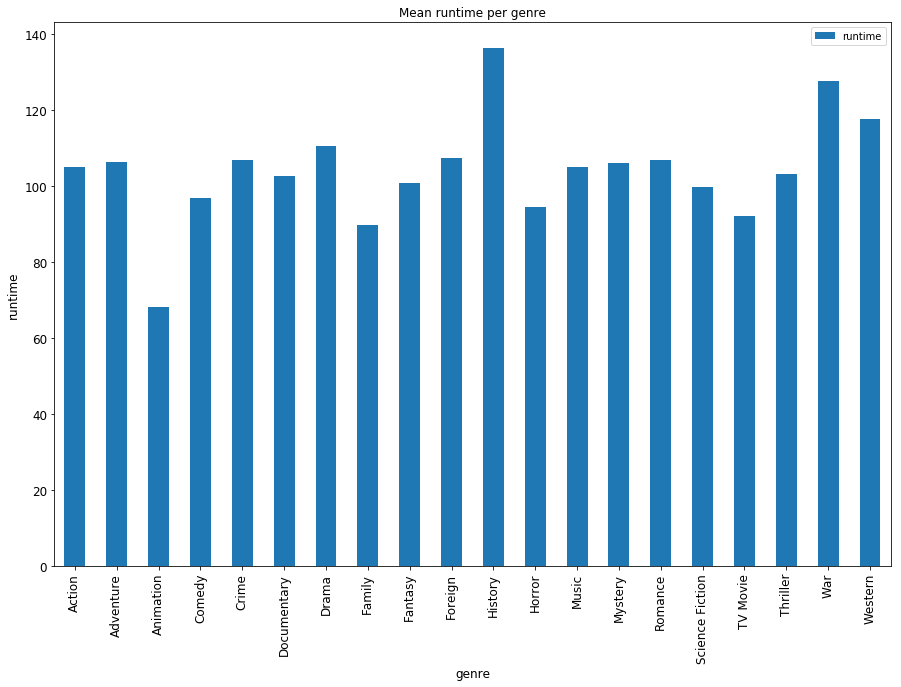

In [26]:
import matplotlib.pyplot as plt
ax = rt.plot(kind='bar', title ="Mean runtime per genre", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("genre", fontsize=12)
ax.set_ylabel("runtime", fontsize=12)
plt.show()

Now the average runtime of movie based on genres are found. So, we can populate the values of movies as a average runtime for the one which has 0 runtime.


In [27]:
runtime_zero=tmdb_uniq_genres[tmdb_uniq_genres.runtime==0]
runtime_zero

,id,imdb_id,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
92,370687,tt3608646,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Fantasy,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
92,370687,tt3608646,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Action,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
92,370687,tt3608646,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,NaN,sword|magic|sorcery|necromancer,Mallister takes Thane prisoner and forces Mare...,0,Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015
334,361931,tt5065822,0,0,Ronaldo,Cristiano Ronaldo,Anthony Wonke,Astonishing. Intimate. Definitive.,biography|soccer player,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015
410,339342,tt2948712,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,Kenny Gage|Devon Downs,NaN,tattoo|tattooing,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015
445,353345,tt3800796,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,Steven R. Monroe,NaN,NaN,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015
486,333653,tt4058368,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,NaN,woman director,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015
486,333653,tt4058368,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,Nancy Savoca,NaN,woman director,The third installment in V.C. Andrewsâ€™ bests...,0,Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015
595,341051,tt2914740,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,Michael Medaglia,NaN,NaN,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015
616,325843,tt4333210,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,Michael Goldfine,NaN,NaN,The film follows a trio of varsity baseball pl...,0,Drama,NaN,11/10/15,20,6.6,2015


In [28]:
len(runtime_zero)

61

We can replace the runtime value of each movie with the average of genres, in which the movie belongs. But since there are only 61 records, instead of replacing, its better to drop those records.

In [29]:
len(tmdb_uniq_genres)

26934

In [30]:
tmdb_uniq_genres=tmdb_uniq_genres[tmdb_uniq_genres.runtime != 0]
len(tmdb_uniq_genres)

26873

Movies with runtime 0 records are droppped.

                                ANALYSING BUDGET COLUMN
 

To find the maximum budget among movies:

In [31]:
max_budget=tmdb_uniq_genres['budget'].max()
max_budget

425000000

The maximum budget allotted to movies is 425000000

To find the maximum budget movie:

In [32]:
b_t = tmdb_uniq_genres['budget'] == max_budget
tmdb_uniq_genres[b_t]['original_title'].unique()

array(["The Warrior's Way"], dtype=object)

The Warrior's Way is the highest budget movie

Which year has the highest budget spent among movies

In [33]:
bud=tmdb_uniq_genres.groupby('release_year')['budget'].sum()
bud

release_year
1960       64140844
1961      117537000
1962      184194630
1963      237328000
1964      134471644
1965      212590345
1966      136164000
1967      324282200
1968      238439000
1969      132203174
1970      480535838
1971      253348000
1972       98048762
1973      155192783
1974      197740000
1975      141258000
1976      356900000
1977      486560000
1978      641104022
1979      727044000
1980     1099600000
1981      866385358
1982     1230450006
1983     1594372236
1984     2152876964
1985     2372357434
1986     1836867065
1987     2125263042
1988     2783571000
1989     3309297140
1990     4045001190
1991     4704466000
1992     4452661816
1993     5319753615
1994     6729787096
1995     8197823125
1996    10871784102
1997    14659373350
1998    13767280000
1999    16207670267
2000    16462900000
2001    17330203000
2002    17996440793
2003    18311679602
2004    21297896216
2005    21697008201
2006    21755080100
2007    23263499212
2008    22167781392
2009   

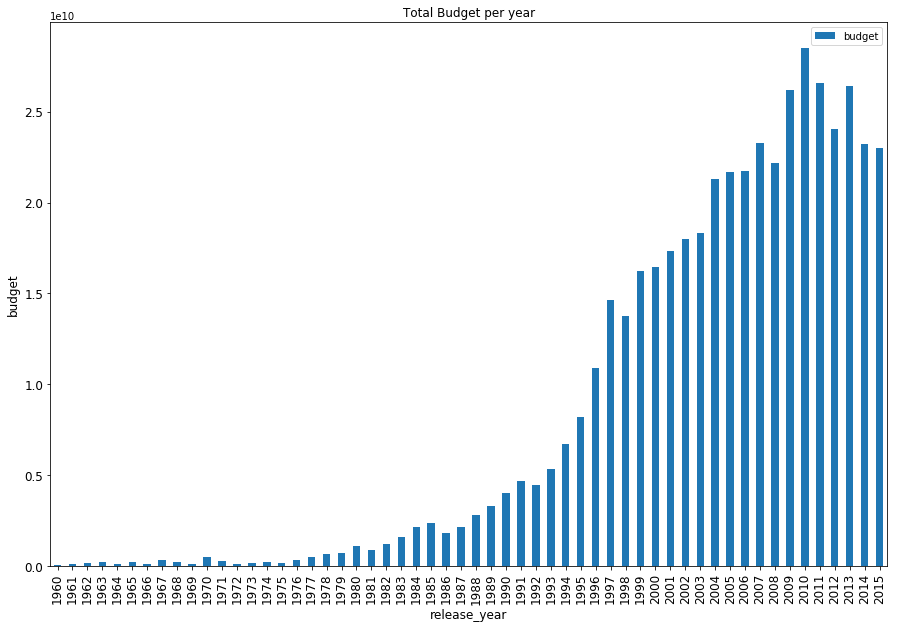

In [34]:
ax = bud.plot(kind='bar', title ="Total Budget per year", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("release_year", fontsize=12)
ax.set_ylabel("budget", fontsize=12)
plt.show()

The highest budget was allotted in the year of 2010.

As per the bar chart, we can conclude that the budgets were allocated more in the recent years, because of development in technology and increase in money value.

         ANALYSING REVENUE COLUMN

1.To find the maximum revenue among movies

In [35]:
max_revenue=tmdb_uniq_genres['revenue'].max()
max_revenue

2781505847

The highest revenue from movie is 2781505847

2. To find the movie which earned the highest revenue

In [36]:
r_t = tmdb_uniq_genres['revenue'] == max_revenue
tmdb_uniq_genres[r_t]['original_title'].unique()

array(['Avatar'], dtype=object)

The highest revenue made movie was Avatar

3.Which year got the total highest revenue among movies

In [37]:
rev=tmdb_uniq_genres.groupby('release_year')['revenue'].sum()
rev

release_year
1960      417915000
1961     1201673874
1962      726409692
1963      552004390
1964     1178849290
1965     1525459848
1966      195736689
1967     2177966116
1968      817108595
1969      743971370
1970     1692997298
1971     1200690537
1972     1104268404
1973     3436775244
1974     2131581080
1975     2684321892
1976     2105714619
1977     5897727904
1978     3341304990
1979     4452452183
1980     4659893813
1981     3949331642
1982     7519309748
1983     6737545803
1984     8023320426
1985     8122437863
1986     7779732493
1987    10170843808
1988    10006935514
1989    14973261643
1990    16277387084
1991    15311580985
1992    19679580741
1993    19239542991
1994    21301354983
1995    28291650149
1996    24482684140
1997    31774477989
1998    28160540039
1999    31642666895
2000    28619618903
2001    42587406267
2002    43694173909
2003    42801167955
2004    50004105495
2005    48236673155
2006    47691109148
2007    60426073803
2008    54764768294
2009   

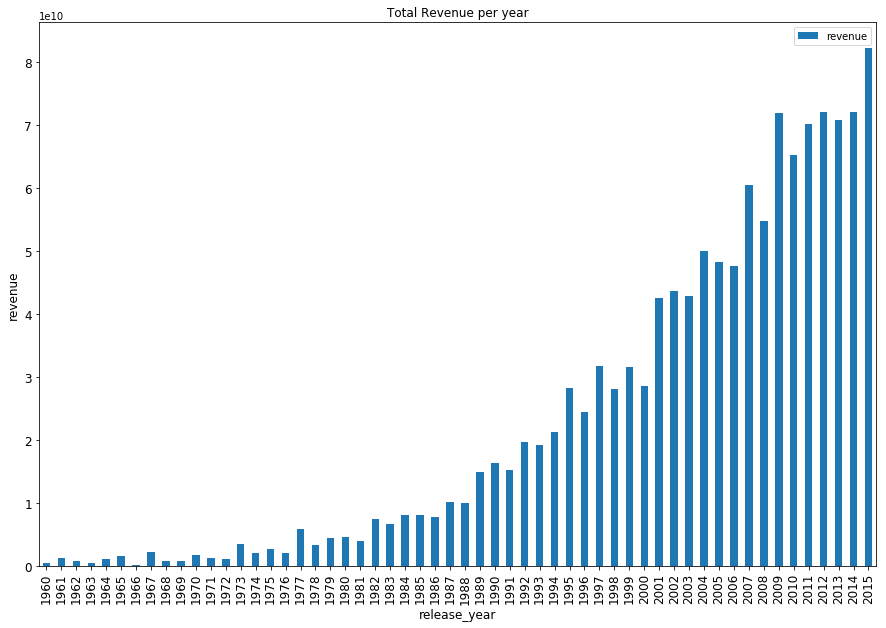

In [38]:
ax = rev.plot(kind='bar', title ="Total Revenue per year", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("release_year", fontsize=12)
ax.set_ylabel("revenue", fontsize=12)
plt.show()

The highest revenue was in the year of 2015.

TO FIND PROFIT AND LOSS ACROSS THE YEARS

Including a column PROFIT which contains the value of difference between revenue and budget

In [39]:
tmdb_uniq_genres['profit']=tmdb_uniq_genres.apply(lambda row: row.revenue - row.budget, axis=1)
tmdb_uniq_genres

,id,imdb_id,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810
0,135397,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810
0,135397,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810
0,135397,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1363528810
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,228436354
2,262500,tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,185238201
2,262500,tt2908446,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,185238201


In [40]:
pro=tmdb_uniq_genres.groupby('release_year')['profit'].mean()
#tmdb_uniq_genres['profit'].unique()
pro

release_year
1960    4.535566e+06
1961    1.445516e+07
1962    6.612379e+06
1963    3.457982e+06
1964    9.408808e+06
1965    1.396670e+07
1966    5.006108e+05
1967    1.891514e+07
1968    6.289887e+06
1969    7.647102e+06
1970    1.133142e+07
1971    7.343741e+06
1972    1.070446e+07
1973    2.343987e+07
1974    1.510813e+07
1975    2.230758e+07
1976    1.433455e+07
1977    3.681067e+07
1978    1.551840e+07
1979    2.623527e+07
1980    1.719949e+07
1981    1.557044e+07
1982    2.966443e+07
1983    2.472680e+07
1984    2.045451e+07
1985    2.075841e+07
1986    1.880654e+07
1987    2.423368e+07
1988    1.941765e+07
1989    3.160966e+07
1990    3.342182e+07
1991    2.930142e+07
1992    4.183219e+07
1993    2.924325e+07
1994    2.868419e+07
1995    4.186214e+07
1996    2.592552e+07
1997    3.260020e+07
1998    2.511913e+07
1999    2.689024e+07
2000    2.092378e+07
2001    3.856062e+07
2002    3.515422e+07
2003    3.327376e+07
2004    3.629104e+07
2005    2.847604e+07
2006    2.486676e+07


                                           ANALYSING AVERAGE VOTE ON YEAR

In [41]:
vote_avg=tmdb_uniq_genres.groupby('release_year')['vote_average'].count()
vote_avg

release_year
1960      78
1961      75
1962      82
1963      91
1964     111
1965      94
1966     119
1967      98
1968      92
1969      80
1970     107
1971     129
1972      94
1973     140
1974     128
1975     114
1976     122
1977     147
1978     174
1979     142
1980     207
1981     198
1982     212
1983     208
1984     287
1985     277
1986     316
1987     332
1988     372
1989     369
1990     366
1991     362
1992     364
1993     476
1994     508
1995     480
1996     525
1997     525
1998     573
1999     574
2000     581
2001     655
2002     731
2003     736
2004     791
2005     932
2006    1043
2007    1116
2008    1238
2009    1349
2010    1207
2011    1274
2012    1268
2013    1368
2014    1461
2015    1375
Name: vote_average, dtype: int64

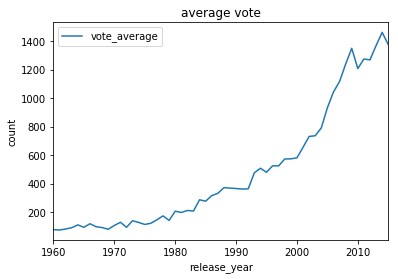

In [46]:
vote_avg.plot()
plt.title('average vote')
plt.ylabel('count')
plt.legend()
plt.show()

The highest average of votes are in later 2010.

                                 ANALYSING DIRECTOR COLUMN

The following Dataframe shows, in which year a director directs how many movies.

In [47]:
tmdb_uniq_genres['COUNTER']=1
dir=tmdb_uniq_genres.groupby(['director','release_year'])['COUNTER'].sum()
dir
#df=pd.DataFrame(dir)
#df

director                                            release_year
 FrÃ©dÃ©ric Jardin                                  2011            4
A.R. Murugadoss                                     2008            5
Aaron Aites                                         2008            1
Aaron Blaise|Robert Walker                          2003            4
Aaron Hann|Mario Miscione                           2015            4
Aaron Harvey                                        2011            3
Aaron Katz|Martha Stephens                          2014            2
Aaron Keeling|Austin Keeling                        2015            2
Aaron Moorhead|Justin Benson                        2015            3
Aaron Norris                                        1988            2
                                                    1990            2
                                                    1991            3
                                                    1992            4
                         

In a way similiar to how genres are identified for a particular movie, cast can also be identified (pipe seperated values) and based on that we can analyse in how many movies a particular actor is involved, in which year a particular actor acts many movies.

In [48]:
tmdb_uniq_genres=tidy_split(tmdb_uniq_genres,'cast')
len(tmdb_uniq_genres)

131272

To split the cast column

In [49]:
tmdb_uniq_genres['cast'].unique()

array(['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan Khan', ...,
       'John Reynolds', 'Diane Mahree', 'Stephanie Nielson'], dtype=object)

cast column was splitted to find the individual actors in the movie

Which year has the highest movie release

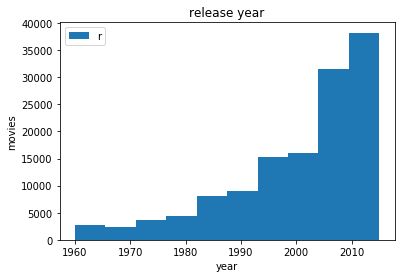

In [54]:
plt.hist(tmdb_uniq_genres['release_year'])
plt.xlabel('year')
plt.ylabel('movies')
plt.title('release year')
plt.legend('release_year')
plt.show()

Most of the movies wer released after 2010.

Average runtime computation

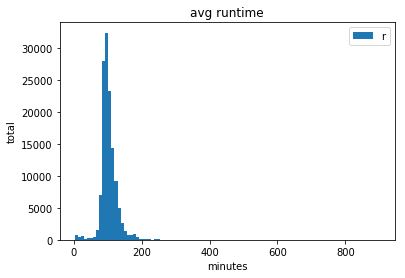

In [55]:
plt.hist(tmdb_uniq_genres['runtime'], bins=100)
plt.xlabel('minutes')
plt.ylabel('total')
plt.title('avg runtime')
plt.legend('runtime')
plt.show()

Most of the movies have their runtime at the average of 130 minutes

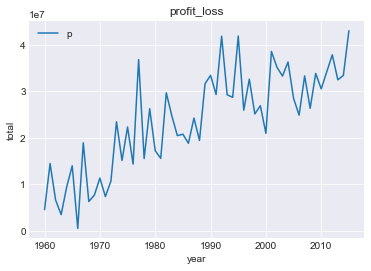

In [56]:
sns.set_style("darkgrid")
plt.plot(pro)
plt.xlabel('year')
plt.ylabel('total')
plt.title('profit_loss')
plt.legend('pro')
plt.show()

Profit and loss varies year over year.

                            LIMITATIONS AND CONCLUSION

Analysing so far, We can come to a conclusion that the budgets alotted to movies increases year by year and so the revenue from the 
movies are also increases. But the profit gained from the movies are not increased year by year. So to calculate the profits gained,
we should consider more factors like released area,inflation  time, cinematographer of the movie,language than budget and revenue . Since most of the values for budget and revenue are missing, could not exactly calculate the profit and loss. Also some of the datas such as cinematographer of the movie,language,music director were not provided. so due to this insufficient of data, I could not compute the  exact profit and loss.
